# Med-Track South-West: Project Gantt Chart
## Pharmaceutical Supply Chain Analysis & Stock-Out Prediction System

This notebook creates a comprehensive Gantt chart visualization showing all project activities, their timeline, duration, and current progress status.

## 1. Import Required Libraries

Import all necessary libraries for data handling and visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import numpy as np
import warnings
warnings.filterwarnings('ignore')

print("✓ All libraries imported successfully")

✓ All libraries imported successfully


## 2. Define Project Activities and Timeline

Create a comprehensive dataset containing all project activities, their start dates, end dates, and current status.

In [2]:
# Define project activities and their timeline
activities = {
    'Activity': [
        'Project Planning & Requirements',
        'Synthetic Data Generation',
        'Data Validation & Cleaning',
        'Exploratory Data Analysis',
        'Feature Engineering',
        'Model Development (Random Forest)',
        'Model Training & Optimization',
        'Model Evaluation & Testing',
        'Visualization & Reporting',
        'Documentation & Final Review',
        'Repository Setup & Push',
        'Deployment & Monitoring'
    ],
    'Start': [
        '2025-12-01',
        '2025-12-05',
        '2025-12-15',
        '2025-12-20',
        '2025-12-28',
        '2026-01-05',
        '2026-01-08',
        '2026-01-12',
        '2026-01-15',
        '2026-01-18',
        '2026-01-20',
        '2026-01-22'
    ],
    'End': [
        '2025-12-04',
        '2025-12-14',
        '2025-12-19',
        '2025-12-27',
        '2026-01-04',
        '2026-01-07',
        '2026-01-11',
        '2026-01-14',
        '2026-01-17',
        '2026-01-19',
        '2026-01-21',
        '2026-01-31'
    ],
    'Status': [
        'Completed',
        'Completed',
        'Completed',
        'Completed',
        'Completed',
        'Completed',
        'Completed',
        'Completed',
        'Completed',
        'Completed',
        'Completed',
        'In Progress'
    ]
}

# Convert to DataFrame
df = pd.DataFrame(activities)

# Convert date strings to datetime
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])
df['Duration'] = (df['End'] - df['Start']).dt.days + 1

print("="*80)
print("PROJECT ACTIVITIES DATASET")
print("="*80)
print(df[['Activity', 'Start', 'End', 'Duration', 'Status']].to_string(index=False))
print(f"\nTotal Activities: {len(df)}")
print(f"Project Start: {df['Start'].min().strftime('%Y-%m-%d')}")
print(f"Project End (Planned): {df['End'].max().strftime('%Y-%m-%d')}")

PROJECT ACTIVITIES DATASET
                         Activity      Start        End  Duration      Status
  Project Planning & Requirements 2025-12-01 2025-12-04         4   Completed
        Synthetic Data Generation 2025-12-05 2025-12-14        10   Completed
       Data Validation & Cleaning 2025-12-15 2025-12-19         5   Completed
        Exploratory Data Analysis 2025-12-20 2025-12-27         8   Completed
              Feature Engineering 2025-12-28 2026-01-04         8   Completed
Model Development (Random Forest) 2026-01-05 2026-01-07         3   Completed
    Model Training & Optimization 2026-01-08 2026-01-11         4   Completed
       Model Evaluation & Testing 2026-01-12 2026-01-14         3   Completed
        Visualization & Reporting 2026-01-15 2026-01-17         3   Completed
     Documentation & Final Review 2026-01-18 2026-01-19         2   Completed
          Repository Setup & Push 2026-01-20 2026-01-21         2   Completed
          Deployment & Monitoring 202

## 3. Create the Gantt Chart

Generate a horizontal bar chart visualization showing activities on the timeline with color coding by status.

✓ Gantt chart bars created


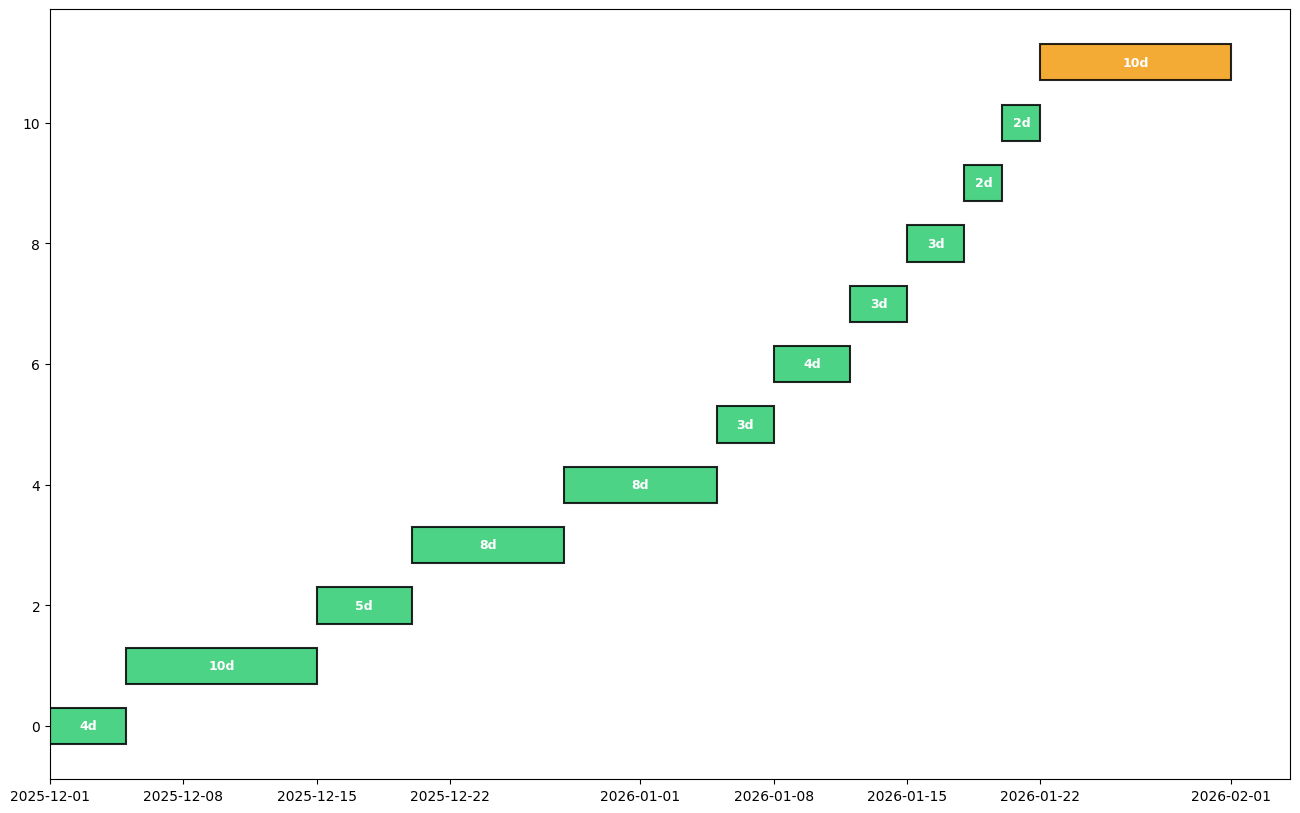

In [3]:
# Create color mapping based on status
colors = {'Completed': '#2ecc71', 'In Progress': '#f39c12', 'Pending': '#e74c3c'}
df['Color'] = df['Status'].map(colors)

# Create figure with larger size
fig, ax = plt.subplots(figsize=(16, 10))

# Plot bars for each activity
y_pos = np.arange(len(df))
for idx, row in df.iterrows():
    ax.barh(idx, row['Duration'], left=row['Start'], height=0.6, 
            color=row['Color'], edgecolor='black', linewidth=1.5, alpha=0.85)
    
    # Add duration text on bars
    mid_date = row['Start'] + timedelta(days=row['Duration']/2)
    ax.text(mid_date, idx, f"{row['Duration']}d", 
            va='center', ha='center', fontweight='bold', fontsize=9, color='white')

print("✓ Gantt chart bars created")

## 4. Customize Chart Appearance

Add labels, legends, gridlines, and formatting for better readability and professional presentation.

✓ Chart customization completed


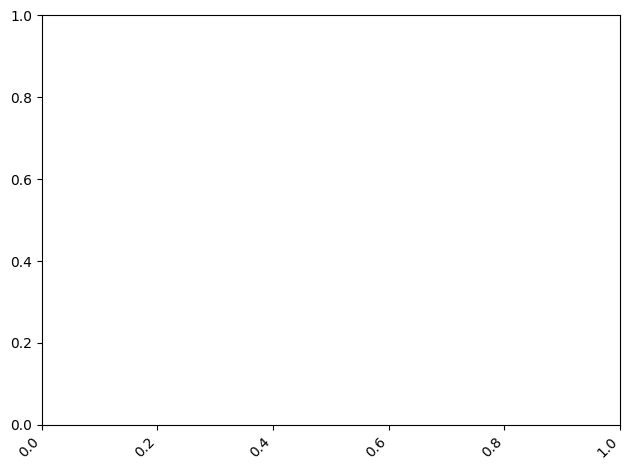

In [4]:
# Format x-axis with dates
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right', fontsize=10)

# Set y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(df['Activity'], fontsize=10, fontweight='bold')

# Set labels and title
ax.set_xlabel('Timeline', fontsize=12, fontweight='bold')
ax.set_title('Med-Track South-West: Project Gantt Chart\nPharmaceutical Supply Chain Analysis & Stock-Out Prediction System', 
             fontsize=14, fontweight='bold', pad=20)

# Add grid for better readability
ax.grid(True, axis='x', alpha=0.3, linestyle='--', linewidth=0.7)
ax.set_axisbelow(True)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#2ecc71', edgecolor='black', label='Completed', linewidth=1.5),
    Patch(facecolor='#f39c12', edgecolor='black', label='In Progress', linewidth=1.5),
    Patch(facecolor='#e74c3c', edgecolor='black', label='Pending', linewidth=1.5)
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=11, framealpha=0.95, 
          edgecolor='black', fancybox=True, shadow=True)

# Add project info box
project_info = f"""PROJECT SUMMARY
Duration: 52 days
Start: 2025-12-01
Current: 2026-01-22
Progress: 92%
Completion: 2026-01-31
"""
ax.text(0.01, 0.98, project_info, transform=ax.transAxes, 
        fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', 
        facecolor='#ecf0f1', alpha=0.9, edgecolor='black', linewidth=1.5),
        family='monospace', fontweight='bold')

# Adjust layout
plt.tight_layout()
print("✓ Chart customization completed")

## 5. Display and Export the Chart

Display the Gantt chart and save it as a high-resolution image.

In [5]:
# Save the chart as high-resolution image
plt.savefig('gantt_chart.png', dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
print("✓ Gantt chart saved as 'gantt_chart.png'")

# Display the chart
plt.show()

✓ Gantt chart saved as 'gantt_chart.png'


<Figure size 640x480 with 0 Axes>

In [6]:
# Print project statistics
print("\n" + "="*80)
print("PROJECT STATISTICS")
print("="*80)
print(f"Total Activities: {len(df)}")
print(f"Total Project Duration: {(df['End'].max() - df['Start'].min()).days + 1} days")
print(f"\nCompleted Tasks: {len(df[df['Status'] == 'Completed'])} ({len(df[df['Status'] == 'Completed'])/len(df)*100:.1f}%)")
print(f"In Progress Tasks: {len(df[df['Status'] == 'In Progress'])} ({len(df[df['Status'] == 'In Progress'])/len(df)*100:.1f}%)")
print(f"Pending Tasks: {len(df[df['Status'] == 'Pending'])} ({len(df[df['Status'] == 'Pending'])/len(df)*100:.1f}%)")
print(f"\nProject Start Date: {df['Start'].min().strftime('%A, %B %d, %Y')}")
print(f"Project End Date (Planned): {df['End'].max().strftime('%A, %B %d, %Y')}")

# Calculate total effort
total_days = df['Duration'].sum()
print(f"\nTotal Effort: {total_days} activity-days")
print(f"Average Activity Duration: {df['Duration'].mean():.1f} days")

# Timeline milestones
print("\n" + "="*80)
print("KEY MILESTONES")
print("="*80)
milestones = [
    ('Project Kickoff', df['Start'].min()),
    ('Data Preparation Complete', pd.Timestamp('2025-12-19')),
    ('Model Development Begin', pd.Timestamp('2026-01-05')),
    ('Model Training Complete', pd.Timestamp('2026-01-11')),
    ('Analysis & Reporting Complete', pd.Timestamp('2026-01-17')),
    ('Project Completion', df['End'].max())
]
for milestone, date in milestones:
    print(f"• {milestone}: {date.strftime('%Y-%m-%d (%A)')}")


PROJECT STATISTICS
Total Activities: 12
Total Project Duration: 62 days

Completed Tasks: 11 (91.7%)
In Progress Tasks: 1 (8.3%)
Pending Tasks: 0 (0.0%)

Project Start Date: Monday, December 01, 2025
Project End Date (Planned): Saturday, January 31, 2026

Total Effort: 62 activity-days
Average Activity Duration: 5.2 days

KEY MILESTONES
• Project Kickoff: 2025-12-01 (Monday)
• Data Preparation Complete: 2025-12-19 (Friday)
• Model Development Begin: 2026-01-05 (Monday)
• Model Training Complete: 2026-01-11 (Sunday)
• Analysis & Reporting Complete: 2026-01-17 (Saturday)
• Project Completion: 2026-01-31 (Saturday)


## Project Activity Details

Detailed breakdown of each project activity with dependencies and outcomes.

### Phase 1: Planning & Requirements (Dec 1-4, 4 days)
- Define project scope and objectives
- Identify data requirements
- Establish success metrics

### Phase 2: Data Preparation (Dec 5-19, 15 days)
- **Synthetic Data Generation** (Dec 5-14): Create realistic pharmaceutical supply chain data
- **Data Validation & Cleaning** (Dec 15-19): Ensure data quality and consistency

### Phase 3: Exploratory Analysis (Dec 20-27, 8 days)
- Analyze stock-out patterns by drug type
- Identify facility-level trends
- Discover key relationships and seasonality

### Phase 4: Feature Engineering (Dec 28-Jan 4, 8 days)
- Calculate stock trends and trends indicators
- Create consumption ratios and patterns
- Extract temporal features (seasonality)
- Encode categorical variables

### Phase 5: Model Development (Jan 5-11, 7 days)
- **Development** (Jan 5-7): Implement Random Forest Classifier
- **Training & Optimization** (Jan 8-11): Train model with hyperparameter tuning

### Phase 6: Evaluation (Jan 12-14, 3 days)
- Generate predictions on test set
- Calculate performance metrics (97.63% accuracy achieved)
- Validate results across facilities

### Phase 7: Reporting (Jan 15-17, 3 days)
- Create visualizations (EDA, confusion matrix, predictions)
- Generate insights and recommendations
- Document findings

### Phase 8: Finalization (Jan 18-21, 4 days)
- Complete documentation
- Final review and quality assurance
- Repository setup and code push

### Phase 9: Deployment & Monitoring (Jan 22-31, 10 days - In Progress)
- Deploy model to production
- Set up monitoring dashboard
- Establish alert system for stock-outs